In [1]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analyse_gridsearch(path2dir):
    results = dict()
    file_names = ["Filter_obj_type_1",'Filter_obj_type_2',
                  'Filter_obj_type_3','NoFilter_obj_type_1',
                  'NoFilter_obj_type_2','NoFilter_obj_type_3',
                  'E_laser']
    
    for file_name in file_names:
        with open(f"{path2dir}/{file_name}.txt","r") as f:
            contents = f.read().splitlines()
            contents = [float(x) for x in contents]
            result = contents[0]
            
        results[f"{file_name}"] = result
    
    # read elapsed time
    file_name = 'output'
    result = [float(line.rstrip('\n').split('=  ')[1]) for line in open(f"{path2dir}/{file_name}.txt") if 'Elapsed' in line]
    results[f"time"] = result[0]

    return results

In [3]:
path2exp = '/beegfs/home/a.yermekova/Thesis_Diploma/Experiment_1/exp1_waket'

In [4]:
exp_number = 0
path2dir = f'{path2exp}/sa{exp_number}'

In [5]:
results = analyse_gridsearch(path2dir)

In [6]:
GridSearch_results = dict()

for exp_number in np.arange(192):
    path2dir = f'{path2exp}/sa{exp_number}'
    results = analyse_gridsearch(path2dir)
    for key in results.keys():
        if key not in GridSearch_results.keys():
            GridSearch_results[key] = []
            GridSearch_results[key].append(results[key])
        else:
            GridSearch_results[key].append(results[key])
    

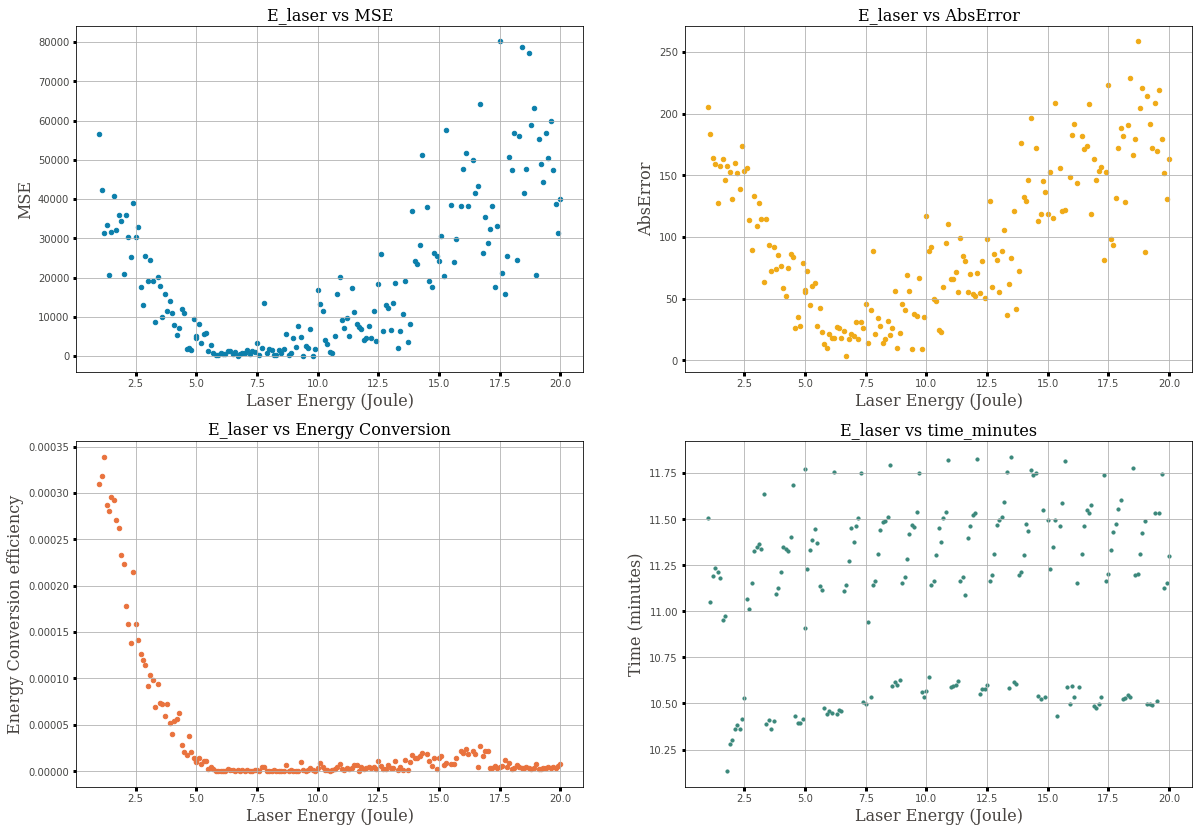

In [14]:
font = {'family': 'serif',
        'color':  '#484441',   
        'weight': 'normal',
        'size': 16,
        }

fig, axs = plt.subplots(2, 2,figsize = (10*2,7*2))

axs[0,0].scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_1'],color='#0b7fab',s=20)
axs[0,0].set_title("E_laser vs MSE", fontdict=font,color='black')
axs[0,0].set_xlabel("Laser Energy (Joule)", fontdict=font)
axs[0,0].set_ylabel("MSE",fontdict=font)
axs[0,0].tick_params(labelcolor='#474745', labelsize=10, width=3)
axs[0,0].grid()

axs[0,1].scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_2'],color='#f0aa17',s=20)
axs[0,1].set_title("E_laser vs AbsError",fontdict=font,color='black')
axs[0,1].set_xlabel("Laser Energy (Joule)", fontdict=font)
axs[0,1].set_ylabel("AbsError",fontdict=font)
axs[0,1].tick_params(labelcolor='#474745', labelsize=10, width=3)
axs[0,1].grid()

axs[1,0].scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_3'],color='#e9723d',s=20)
axs[1,0].set_title("E_laser vs Energy Conversion",fontdict=font,color='black')
axs[1,0].set_xlabel("Laser Energy (Joule)", fontdict=font)
axs[1,0].set_ylabel("Energy Conversion efficiency",fontdict=font)
axs[1,0].tick_params(labelcolor='#474745', labelsize=10, width=3)
axs[1,0].grid()

axs[1,1].scatter(GridSearch_results['E_laser'],GridSearch_results['time'],color='#3B887B',s=10) #125446 BC7D85 #689240 #012e67 #367d56 3B887B  #01d3fc
axs[1,1].set_title("E_laser vs time_minutes",fontdict=font,color='black')
axs[1,1].set_xlabel("Laser Energy (Joule)", fontdict=font)
axs[1,1].set_ylabel("Time (minutes)",fontdict=font)
axs[1,1].tick_params(labelcolor='#474745', labelsize=10, width=3)
axs[1,1].grid()

In [8]:
print(f"Minimum is {np.min(GridSearch_results['Filter_obj_type_1'])}")

Minimum is nan


In [9]:
print(f"ArgMinimum is {np.argmin(GridSearch_results['Filter_obj_type_1'])}")

ArgMinimum is 135


Text(0.5, 1.0, 'E_laser vs time_minutes')

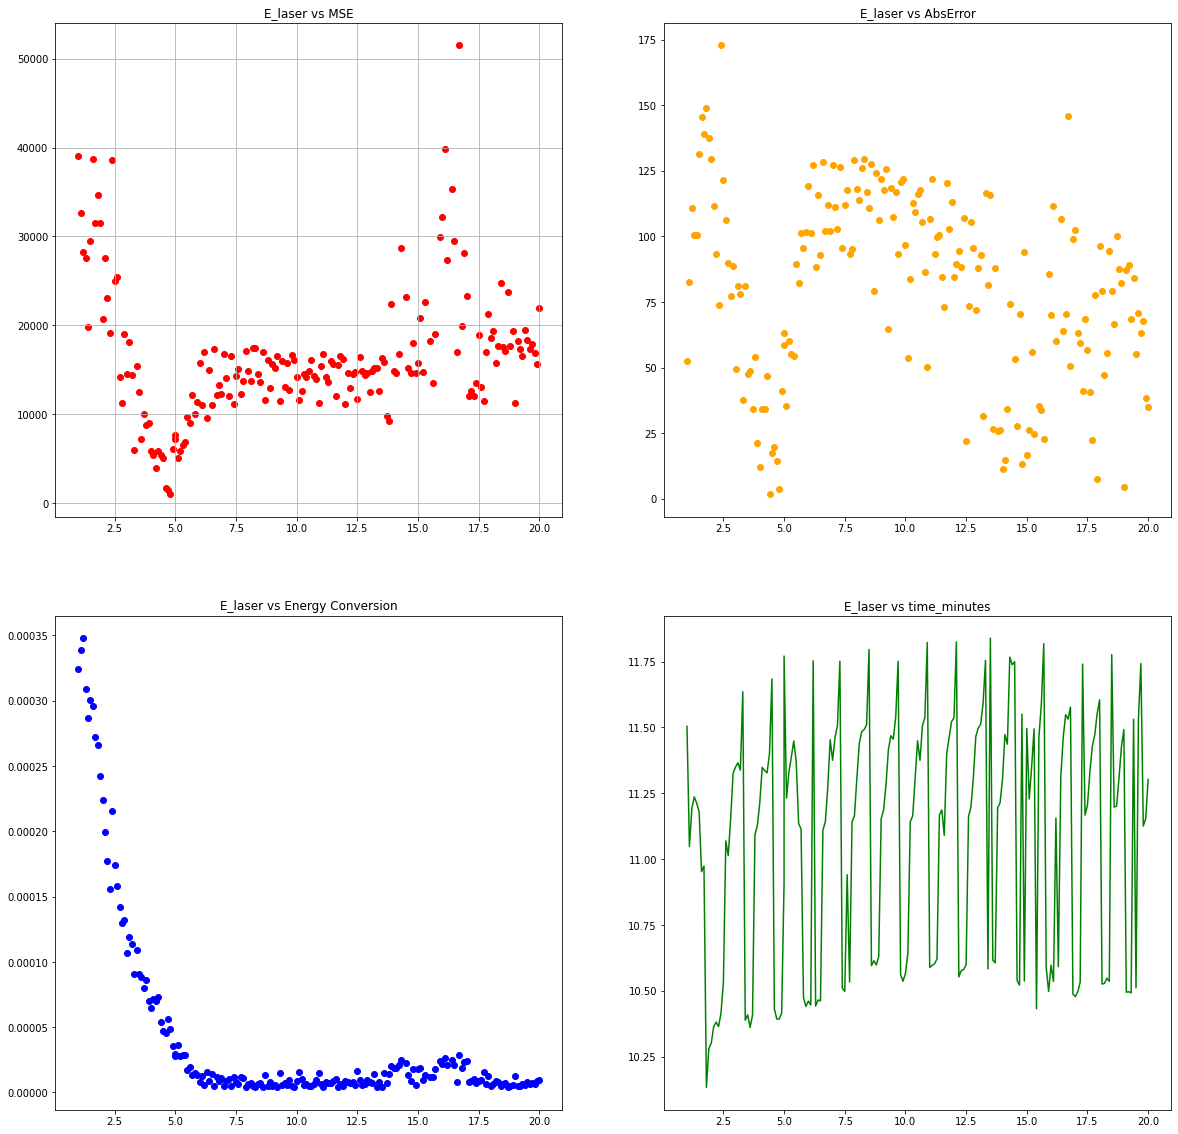

In [10]:
fig, axs = plt.subplots(2, 2,figsize = (20,20))

axs[0,0].scatter(GridSearch_results['E_laser'],GridSearch_results['NoFilter_obj_type_1'],color='red')
axs[0,0].set_title("E_laser vs MSE")
axs[0,0].grid()

axs[0,1].scatter(GridSearch_results['E_laser'],GridSearch_results['NoFilter_obj_type_2'],color='orange')
axs[0,1].set_title("E_laser vs AbsError")

axs[1,0].scatter(GridSearch_results['E_laser'],GridSearch_results['NoFilter_obj_type_3'],color='blue')
axs[1,0].set_title("E_laser vs Energy Conversion")

axs[1,1].plot(GridSearch_results['E_laser'],GridSearch_results['time'],color='green')
axs[1,1].set_title("E_laser vs time_minutes")

In [11]:
def value_is_nan(exp_number):
    path2exp = '/beegfs/home/a.yermekova/Thesis_Diploma/Experiment_1/exp1_waket'
    path2dir = f'{path2exp}/sa{exp_number}'
    file_name = 'E_laser'
#     with open(f"{path2dir}/{file_name}.txt","r") as f:
#         contents = f.read().splitlines()
#         contents = [float(x) for x in contents]
#         result = contents[0]

    result = 15.0
    return result   

In [12]:
for i,obj in enumerate(GridSearch_results['Filter_obj_type_1']):
    if np.isnan(obj):
        print(i)
#         value_is_nan(exp_number=i)
#         !sbatch sa{exp_number}/work_sbatch.sh --energy_laser {result}

135
145
149
154


In [13]:
for i,obj in enumerate(GridSearch_results['Filter_obj_type_2']):
    if np.isnan(obj):
        print(i)
#         value_is_nan(exp_number=i)
#         !sbatch sa{exp_number}/work_sbatch.sh --energy_laser {result}

135
145
149
154


In [14]:
for i,obj in enumerate(GridSearch_results['NoFilter_obj_type_1']):
    if np.isnan(obj):
        print(i)
#         value_is_nan(exp_number=i)
#         !sbatch sa{exp_number}/work_sbatch.sh --energy_laser {result}

135
145
149
154


In [15]:
14.4, 15.4, 15.8, 16.3

(14.4, 15.4, 15.8, 16.3)

### To save the pictures

In [67]:
font = {'family': 'serif',
        'color':  '#484441',   
        'weight': 'normal',
        'size': 16,
        }

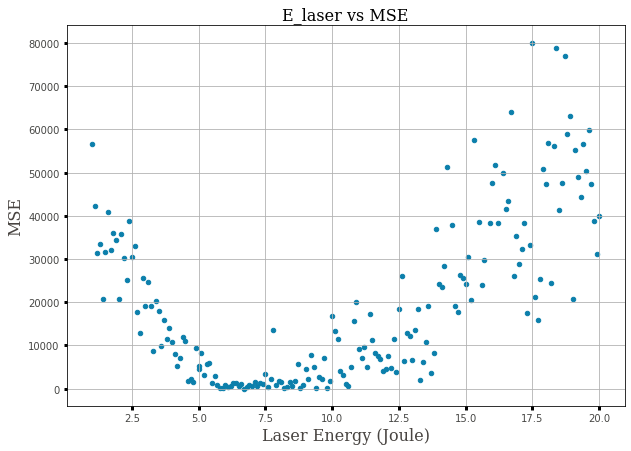

In [66]:
plt.figure(figsize=(10,7))

plt.scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_1'],color='#0b7fab',s=20)
plt.title("E_laser vs MSE", fontdict=font,color='black')
plt.xlabel("Laser Energy (Joule)", fontdict=font)
plt.ylabel("MSE",fontdict=font)
plt.tick_params(labelcolor='#474745', labelsize=10, width=3)
plt.grid()
plt.savefig("E_laser_vs_obj_func1.png")

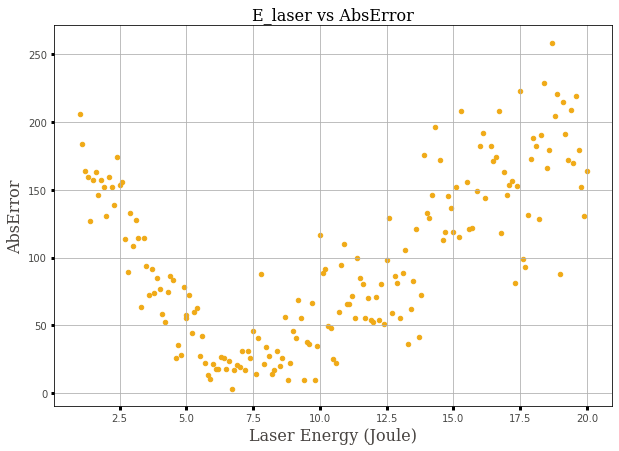

In [69]:
plt.figure(figsize=(10,7))

plt.scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_2'],color='#f0aa17',s=20)
plt.title("E_laser vs AbsError",fontdict=font,color='black')
plt.xlabel("Laser Energy (Joule)", fontdict=font)
plt.ylabel("AbsError",fontdict=font)
plt.tick_params(labelcolor='#474745', labelsize=10, width=3)
plt.grid()
plt.savefig("E_laser_vs_obj_func2.png")

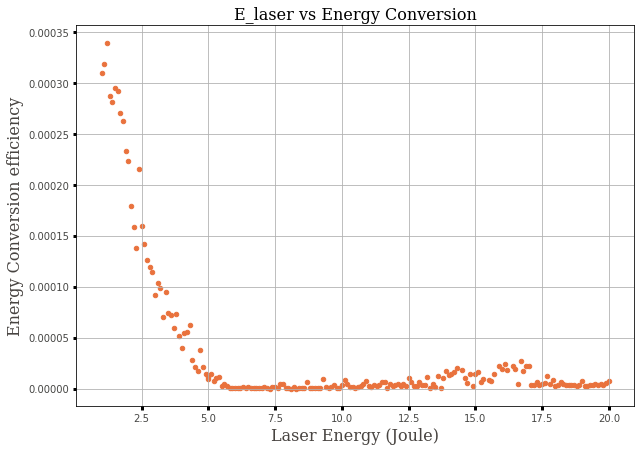

In [71]:
plt.figure(figsize=(10,7))

plt.scatter(GridSearch_results['E_laser'],GridSearch_results['Filter_obj_type_3'],color='#e9723d',s=20)
plt.title("E_laser vs Energy Conversion",fontdict=font,color='black')
plt.xlabel("Laser Energy (Joule)", fontdict=font)
plt.ylabel("Energy Conversion efficiency",fontdict=font)
plt.tick_params(labelcolor='#474745', labelsize=10, width=3)
plt.grid()
plt.savefig("E_laser_vs_obj_func3.png")

In [10]:
GridSearch_results['time'] = np.array(GridSearch_results['time'])

In [11]:
GridSearch_results['time'].sum() / 60

35.45986628946642

In [12]:
np.argmin(GridSearch_results['Filter_obj_type_2'][:120])

58

In [16]:
GridSearch_results.keys()

dict_keys(['Filter_obj_type_1', 'Filter_obj_type_2', 'Filter_obj_type_3', 'NoFilter_obj_type_1', 'NoFilter_obj_type_2', 'NoFilter_obj_type_3', 'E_laser', 'time'])

In [17]:
import pandas as pd

In [33]:
df = pd.DataFrame(GridSearch_results)
df.to_csv('df_gridsearch.csv', index=False)

In [19]:
df

,Filter_obj_type_1,Filter_obj_type_2,Filter_obj_type_3,NoFilter_obj_type_1,NoFilter_obj_type_2,NoFilter_obj_type_3,E_laser,time
0,56614.606642,205.670785,0.000310,39089.477337,52.463004,0.000324,1.0,11.503809
1,42237.495572,183.827564,0.000319,32641.668107,82.783645,0.000339,1.1,11.047700
2,31399.690447,163.938850,0.000339,28292.614577,110.661252,0.000348,1.2,11.191639
3,33431.394444,159.306867,0.000287,27541.871764,100.708010,0.000309,1.3,11.236263
4,20688.129510,127.257437,0.000281,19786.907061,100.494143,0.000287,1.4,11.211917
...,...,...,...,...,...,...,...,...
187,59926.066939,219.100803,0.000003,17320.511122,70.921959,0.000006,19.6,11.531758
188,47438.877877,179.042053,0.000004,17955.642800,63.245709,0.000007,19.7,11.742209
189,38723.277597,151.898260,0.000004,16917.977369,67.608797,0.000007,19.8,11.125340
190,31240.153340,130.352678,0.000006,15622.933974,38.440714,0.000009,19.9,11.153348


In [25]:
df.dropna(inplace=True)

In [27]:
df

,Filter_obj_type_1,Filter_obj_type_2,Filter_obj_type_3,NoFilter_obj_type_1,NoFilter_obj_type_2,NoFilter_obj_type_3,E_laser,time
0,56614.606642,205.670785,0.000310,39089.477337,52.463004,0.000324,1.0,11.503809
1,42237.495572,183.827564,0.000319,32641.668107,82.783645,0.000339,1.1,11.047700
2,31399.690447,163.938850,0.000339,28292.614577,110.661252,0.000348,1.2,11.191639
3,33431.394444,159.306867,0.000287,27541.871764,100.708010,0.000309,1.3,11.236263
4,20688.129510,127.257437,0.000281,19786.907061,100.494143,0.000287,1.4,11.211917
...,...,...,...,...,...,...,...,...
187,59926.066939,219.100803,0.000003,17320.511122,70.921959,0.000006,19.6,11.531758
188,47438.877877,179.042053,0.000004,17955.642800,63.245709,0.000007,19.7,11.742209
189,38723.277597,151.898260,0.000004,16917.977369,67.608797,0.000007,19.8,11.125340
190,31240.153340,130.352678,0.000006,15622.933974,38.440714,0.000009,19.9,11.153348


In [ ]:
df[df['E_laser']]

In [32]:
df[df['Filter_obj_type_2'] == df['Filter_obj_type_2'].min()]

,Filter_obj_type_1,Filter_obj_type_2,Filter_obj_type_3,NoFilter_obj_type_1,NoFilter_obj_type_2,NoFilter_obj_type_3,E_laser,time
58,22.866056,3.385752,8.541929e-07,12148.20717,101.87663,0.000012,6.7,11.141875


In [22]:
df_na = df[df.isna().any(axis=1)]